In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Homework # 2 - Exploratory Data Analysis & Data Preparation
Data files: white_wine_quality.csv & shoppers.csv

## Part 1: Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### Load data

In [3]:
# Read data from file into dataframe
# Note: field separator is ;

# Whine Wine Quality data load
white_wine_quality_df = pd.read_csv('white_wine_quality.csv', delimiter=";")

# Shoppers data load
shoppers_df = pd.read_csv('shoppers.csv')

In [4]:
white_wine_quality_df.head(10)

shoppers_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


### Examine data

In [5]:
# Display dataframe shape
white_wine_quality_df.shape

shoppers_df.shape

(4898, 12)

(10, 4)

In [6]:
# Display first few rows
print("Displaying the first few rows for white_wine_quality_df")
white_wine_quality_df.head(10)
print()
print("Displaying the first few rows for shoppers_df")
shoppers_df.head(10)

Displaying the first few rows for white_wine_quality_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6



Displaying the first few rows for shoppers_df


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Generate summary statistics on data

Summary Statistics for white_wine_quality_df

In [7]:
white_wine_quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Summary statistics for shoppers_df

In [8]:
shoppers_df.describe()

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


### Generate insights on the dependent variable

In [9]:
# Display the distinct classes (quality)

# Displaying the distinct classes for white_wine_quality
print('Displaying distinct classes for white_quality_df')
white_wine_quality_df["quality"].unique()



print()
# Displaying the distinct classes for shoppers
print('Displaying distinct classes for shoppers_df')
shoppers_df["Online Shopper"].unique()

Displaying distinct classes for white_quality_df


array([6, 5, 7, 8, 4, 3, 9], dtype=int64)


Displaying distinct classes for shoppers_df


array(['No', 'Yes'], dtype=object)

In [10]:
# Display the counts for each class (quality)
quality = "Quality"
shoppers = "Online Shopper"

# Displaying the count of the class 'quality' for white_wine_quality

print(f'Displaying the count of the class {quality} for white_quality_df')
white_wine_quality_count = white_wine_quality_df.value_counts(subset=["quality"]).reset_index()
white_wine_quality_count.columns = ["Quality", "Count"]
white_wine_quality_count

print()
# Displaying the count of the 'online shoppers' class for shoppers
print(f'Displaying the count of the class {shoppers} for white_quality_df')
shoppers_count = shoppers_df.value_counts(subset=["Online Shopper"]).reset_index()
shoppers_count.columns = ["Online Shoppers", "Count"] 
shoppers_count

Displaying the count of the class Quality for white_quality_df


,Quality,Count
0,6,2198
1,5,1457
2,7,880
3,8,175
4,4,163
5,3,20
6,9,5



Displaying the count of the class Online Shopper for white_quality_df


,Online Shoppers,Count
0,No,5
1,Yes,5


<BarContainer object of 7 artists>

Text(0.5, 0, 'Quality')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot of Quality')

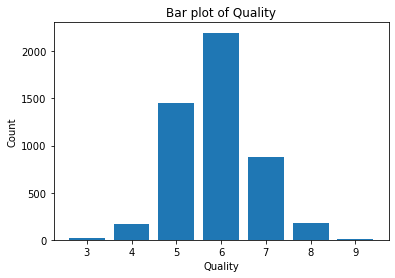

In [11]:
# Display (i.e. bar graph) the distribution of the classes (quality)
plt.bar(x = white_wine_quality_count["Quality"], height = white_wine_quality_count["Count"])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Bar plot of Quality")

<BarContainer object of 2 artists>

Text(0.5, 0, 'Quality')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot of Online Shoppers')

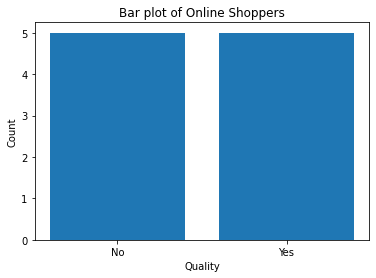

In [12]:
# Display (i.e. bar graph) the distribution of the classes (Online shoppers)
plt.bar(x = shoppers_count["Online Shoppers"], height = shoppers_count["Count"])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Bar plot of Online Shoppers")

### Visualize the correlation matrix using a heatmap in seaborn

In [13]:
# Display the correlation matrix
print("The correlation matrix for white_wine_quality_df")
white_wine_quality_df.corr()

print()
print()
print("The correlation matrix for Shoppers_df")
shoppers_df.corr()

The correlation matrix for white_wine_quality_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678




The correlation matrix for Shoppers_df


,Age,Income
Age,1.000000,0.982495
Income,0.982495,1.000000


Heat Map for White Wine


Text(0.5, 1.0, 'Heat Map for White Wine')

<AxesSubplot:title={'center':'Heat Map for White Wine'}>

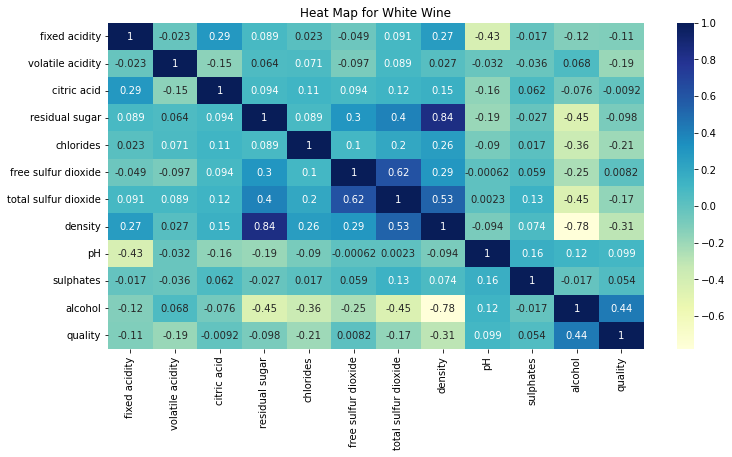

In [14]:
# the heat map for white_wine_quality
print("Heat Map for White Wine")
fig = plt.subplots(figsize = (12, 6))
heat_map_white_wine = sns.heatmap(white_wine_quality_df.corr(), cmap="YlGnBu",
                                  annot=True)
plt.title("Heat Map for White Wine")
heat_map_white_wine

Heat Map for Shoppers


Text(0.5, 1.0, 'Heat Map for Shopper')

<AxesSubplot:title={'center':'Heat Map for Shopper'}>

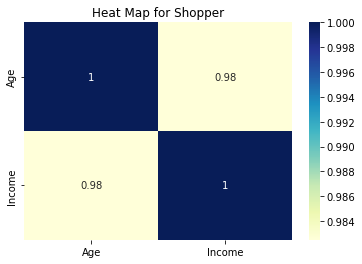

In [15]:
# the heat map for shoppers
print("Heat Map for Shoppers")
heat_map_shoppers = sns.heatmap(shoppers_df.corr(), cmap="YlGnBu",
                                  annot=True)
plt.title("Heat Map for Shopper")
heat_map_shoppers

## Part 2: Data Preparation

### Import libraries

In [16]:
from sklearn.impute import SimpleImputer                         # for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder    # for encoding categorical data
from sklearn.model_selection import train_test_split             # for splitting training and testing data
from sklearn.preprocessing import StandardScaler                 # for feature scaling

### Load new dataset

In [17]:
# Read data from file into dataframe
shoppers_df = pd.read_csv("shoppers.csv")

### Examine new dataset

In [18]:
# Review data
shoppers_df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Identify missing values

In [19]:
shoppers_df.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

### Impute missing values

In [20]:
# Create temporary dataframe 1 with only Age and Income columns
shoppers_df1 = shoppers_df[['Age', 'Income']]
shoppers_df1

,Age,Income
0,49.0,86400.0
1,32.0,57600.0
2,35.0,64800.0
3,43.0,73200.0
4,45.0,NaN
5,40.0,69600.0
6,NaN,62400.0
7,53.0,94800.0
8,55.0,99600.0
9,42.0,80400.0


In [21]:
# Replace missing values with mean of all the other values
shoppers_df1.replace({'Age': {np.nan:int(shoppers_df1["Age"].mean())},
                      'Income':{np.nan:round(shoppers_df1["Income"].mean(),2)}})

,Age,Income
0,49.0,86400.00
1,32.0,57600.00
2,35.0,64800.00
3,43.0,73200.00
4,45.0,76533.33
5,40.0,69600.00
6,43.0,62400.00
7,53.0,94800.00
8,55.0,99600.00
9,42.0,80400.00


In [22]:
# Create temporary dataframe 2 with post-imputation data
shoppers_df2 = shoppers_df1.replace({'Age': {np.nan:int(shoppers_df1["Age"].mean())},
                      'Income':{np.nan:round(shoppers_df1["Income"].mean(),2)}})
shoppers_df2

,Age,Income
0,49.0,86400.00
1,32.0,57600.00
2,35.0,64800.00
3,43.0,73200.00
4,45.0,76533.33
5,40.0,69600.00
6,43.0,62400.00
7,53.0,94800.00
8,55.0,99600.00
9,42.0,80400.00


In [23]:
# Drop Age and Income columns in original dataframe
shoppers_df.drop(['Age', 'Income'], axis=1, inplace=True)
shoppers_df

,Region,Online Shopper
0,India,No
1,Brazil,Yes
2,USA,No
3,Brazil,No
4,USA,Yes
5,India,Yes
6,Brazil,No
7,India,Yes
8,USA,No
9,India,Yes


In [24]:
# Add imputed columns Age and Income to original dataframe
shoppers_new = shoppers_df.join(shoppers_df2)

In [25]:
# Display dataframe rows
shoppers_new

,Region,Online Shopper,Age,Income
0,India,No,49.0,86400.00
1,Brazil,Yes,32.0,57600.00
2,USA,No,35.0,64800.00
3,Brazil,No,43.0,73200.00
4,USA,Yes,45.0,76533.33
5,India,Yes,40.0,69600.00
6,Brazil,No,43.0,62400.00
7,India,Yes,53.0,94800.00
8,USA,No,55.0,99600.00
9,India,Yes,42.0,80400.00


### Generate one-hot encodings for Region column

In [26]:
# List unique values for Region
shoppers_new["Region"].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [27]:
# Generate encodings for Region
region_dummies = pd.get_dummies(shoppers_new[["Region"]])
region_dummies

,Region_Brazil,Region_India,Region_USA
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,1,0
8,0,0,1
9,0,1,0


In [28]:
# Generate encodings for Region
shoppers_df3 = pd.get_dummies(shoppers_new, prefix=['Region'], columns = ['Region'])
shoppers_df3.head()

,Online Shopper,Age,Income,Region_Brazil,Region_India,Region_USA
0,No,49.0,86400.00,0,1,0
1,Yes,32.0,57600.00,1,0,0
2,No,35.0,64800.00,0,0,1
3,No,43.0,73200.00,1,0,0
4,Yes,45.0,76533.33,0,0,1


In [29]:
# Join dataframe with Region-encoded dataframe
shoppers_new2 = shoppers_new.join(region_dummies)
shoppers_new2

,Region,Online Shopper,Age,Income,Region_Brazil,Region_India,Region_USA
0,India,No,49.0,86400.00,0,1,0
1,Brazil,Yes,32.0,57600.00,1,0,0
2,USA,No,35.0,64800.00,0,0,1
3,Brazil,No,43.0,73200.00,1,0,0
4,USA,Yes,45.0,76533.33,0,0,1
5,India,Yes,40.0,69600.00,0,1,0
6,Brazil,No,43.0,62400.00,1,0,0
7,India,Yes,53.0,94800.00,0,1,0
8,USA,No,55.0,99600.00,0,0,1
9,India,Yes,42.0,80400.00,0,1,0


In [30]:
# Drop Region column since it is now encoded
shoppers_new2.drop("Region", axis = 1, inplace = True)

shoppers_new2

,Online Shopper,Age,Income,Region_Brazil,Region_India,Region_USA
0,No,49.0,86400.00,0,1,0
1,Yes,32.0,57600.00,1,0,0
2,No,35.0,64800.00,0,0,1
3,No,43.0,73200.00,1,0,0
4,Yes,45.0,76533.33,0,0,1
5,Yes,40.0,69600.00,0,1,0
6,No,43.0,62400.00,1,0,0
7,Yes,53.0,94800.00,0,1,0
8,No,55.0,99600.00,0,0,1
9,Yes,42.0,80400.00,0,1,0


### Encode lables

In [31]:
# Encode Online Shopper column
# Encode Employment Status column
le = LabelEncoder()
shoppers_new2['Online Shopper']= le.fit_transform(shoppers_new2['Online Shopper']) 
shoppers_new2.head()

,Online Shopper,Age,Income,Region_Brazil,Region_India,Region_USA
0,0,49.0,86400.00,0,1,0
1,1,32.0,57600.00,1,0,0
2,0,35.0,64800.00,0,0,1
3,0,43.0,73200.00,1,0,0
4,1,45.0,76533.33,0,0,1


### Display final dataframe rows

In [32]:
shoppers_final = shoppers_new2

# Display final dataframe
shoppers_final

,Online Shopper,Age,Income,Region_Brazil,Region_India,Region_USA
0,0,49.0,86400.00,0,1,0
1,1,32.0,57600.00,1,0,0
2,0,35.0,64800.00,0,0,1
3,0,43.0,73200.00,1,0,0
4,1,45.0,76533.33,0,0,1
5,1,40.0,69600.00,0,1,0
6,0,43.0,62400.00,1,0,0
7,1,53.0,94800.00,0,1,0
8,0,55.0,99600.00,0,0,1
9,1,42.0,80400.00,0,1,0
